In [1]:
import nltk
import os
import string
from HMM import supervised_HMM, unsupervised_HMM, HiddenMarkovModel
import re
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    visualize_sparsities,
    animate_emission
)

In [2]:
def load_poems(filename):
    
    lines = [] # 2d dictionary, each array is a split + cleaned line
    words = {} # dictionary of a word, and its frequency
    
    file = open(filename, 'r')
    
    for line in file:
        line = line.strip()
        if  len(line) < 10:
            # Too short to be a valid line
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        lines.append(line)

        for word in line:
            try:
                # add to frequency if the word is already in the dic
                words[word] += 1
            except KeyError:
                # if not, add the word to the dic
                words[word] = 1
    return lines, words

In [3]:
file = "data/shakespeare.txt"
lines, words = load_poems(file)

In [4]:
lines[0]

['from', 'fairest', 'creatures', 'we', 'desire', 'increase']

In [5]:
def unsupervised_learning(lines, n_states, n_iters):
    '''
    n_iters: Number of iterations we should go through.
    n_states: Number of hidden states our HMM should have.
    '''
    # Train the HMM.
    obs, obs_map =  parse_observations(lines)
    flat_lines = [[item] for sublist in lines for item in sublist]
    leHMM = unsupervised_HMM(obs, n_states, n_iters)
    return leHMM, obs,obs_map 
    

In [6]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [7]:
def parse_observations(lines):

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [8]:
obs, obs_map = parse_observations(lines)

In [9]:
# get syllable info from syllable_dictionary.txt
def load_syllables(filename):
    file = open(filename, 'r')
    syllable = {}
    for line in file:
        line = line.split()
        #print(line)
        word = line[0]
        rest = line[1: len(line)]

        syllable[word] = rest
    return syllable

In [10]:
filename = "data/Syllable_dictionary.txt"
syllable = load_syllables(filename)

In [11]:
def save_HMM(hmmmmmm, filename):
    
    with open(filename+".txt", "w+") as filept:
        filept.write(str(hmmmmmm.L)+"\n")
        filept.write(str(hmmmmmm.D)+"\n")
        for i in hmmmmmm.A:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        for i in hmmmmmm.O:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        

def read_HMM(filename):
    with open(filename+".txt", "r") as filept:
        L = int(filept.readline())
        D = int(filept.readline())
        O = []
        A = []
        for i in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            A.append(line)
        for j in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            O.append(line)
    return HiddenMarkovModel(A, O)

In [12]:
testHMM40 = read_HMM("40-iter-8-hidden-hmm")

In [13]:
obs_map_r = obs_map_reverser(obs_map)

In [14]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission(10) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

And ill be keeps no benefit false expressed i oft
The jaws of hand love was that slave no still
Spirits to life the steel find out thy frame unused
Miles feeds pitywanting o eyes whether go youth have she
Profitless worthiness unless my not forebemoaned didst others into thy
I perish walls you thy earth thine hide his fight
Which add to flower tongue they in black thou shalt
Excess bath his from his harmful with as that my
With borne verse my phrase west will might heart your
Image to his foot none live my in tired of
Shun art are bred what she strumpeted feil their a
Cry call taken shall despite thy boughs the verse hate
Give early was of him will and brand not distraction
Could be to gave to defect creation bright in the


In [15]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

That blessed mine cancelled some of clock set
For that that of love thy of time i slept
So crawls costs loved your in thou herself so
Makes from to me crime use mine as sang not
Whose are on thy up loves therefore gentle
Since as wherein me splendour care had thy
Art before bring whose back scope not that so
Alien of times great evermore cloud make
From and summers else in some thy put not
Loves play shadow doth more wide of thou me
Mine all throw beyond love found days i heart
Light glass the wouldst not it veins is not in
Forfeit remove thou cupid to i fair
If o eternity honour life chose


In [16]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables_other(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

I as he my hear my entertain lack
Minutes you such thee away old but so
Pride you cold of thine the thought entertain
Lies all art testy redeem they did i
So accents messengers their not should love
Me fickle report since at tincture and
To not thy then numbers place plea made my
To beauties for your i muse a my with
In for thee this lies watchman bright by to
To gone have had argument sweet my many
Then there eternity fair so sour what
Words humour war be their self and my hear
Kind i much swift in decease cloak and pays
Methinks in every with faults heaven won and


In [21]:
for i in range(14): # each poem is 14 lines long
    emission = testHMM40.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 words long
    sentence = [obs_map_r[i] for i in emission[0]]

    print(' '.join(sentence).capitalize())

Dear my i my fade thee unless my rise
Is tomb and not conceit things often i
That thou for better time dead your kill the
The thou then let as lovely and tyrant
Behold for near ensconce authority
Yet bad april seem the on virtue gave
The lily had to i to i dear by
Numbers cause my didst his not muse to passion
Shifts lace need i for love heed me fickle
Sleeping thought my with mayst hand brow thoughts free
Even heart and your thou refined purpose
The restore men pen lies blessed buriest
Exceeded night one my self my hast his
His granting allege mute gives of transfix


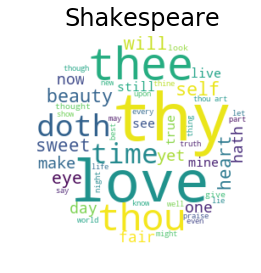

In [22]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

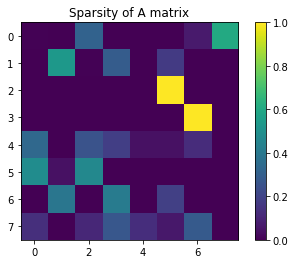

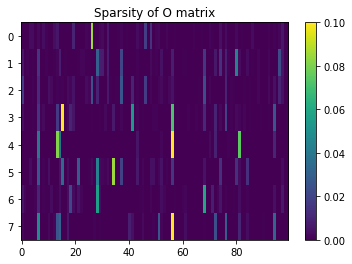

In [23]:
visualize_sparsities(testHMM40, O_max_cols=100)

In [24]:
len(testHMM40.O[0])

3175

In [25]:
emission

([21, 2217, 1549, 2163, 205, 100, 1764], [5, 0, 2, 5, 2, 5, 2])

In [26]:
ind = np.where(np.array(emission[1]) == 5)[0]
ind

array([0, 3, 5], dtype=int64)

In [27]:
np.array(emission[0])[ind]

array([  21, 2163,  100])

In [28]:
obs_map_r[247]

'work'

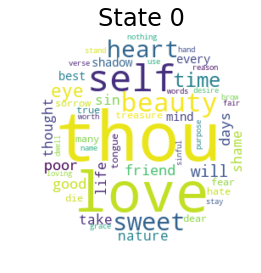

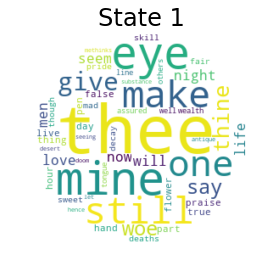

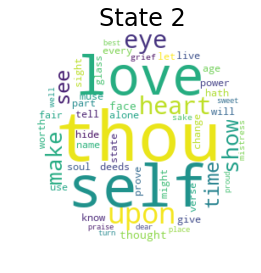

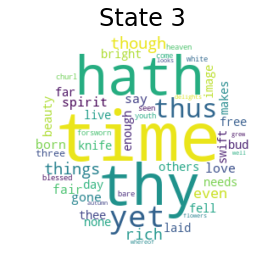

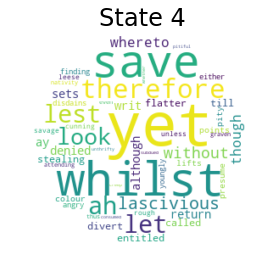

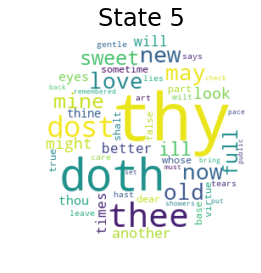

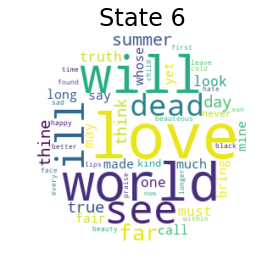

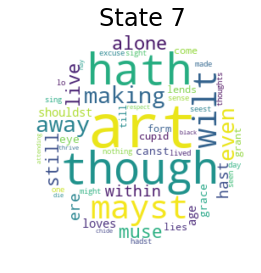

In [29]:
wordclouds = states_to_wordclouds(testHMM40, obs_map, syllable)

In [30]:
def script():
    file = open("data/shakespeare.txt", 'r')
    throwaway = [98, 125, 144]
    sonnet_counter = 0
    i = 0
    all_pairs = []
    temp = [[] for _ in range(7)]
    for line in file:
        line = line.strip()
        if len(line) < 10:
            # Too short to be a valid line
            if i != 0:
                if sonnet_counter not in throwaway:
                    all_pairs.extend(temp)
                sonnet_counter += 1
                i = 0
                temp = [[] for _ in range(7)]
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        last = line[-1]
        
        if i == 0 or i == 2:
            # a
            temp[0].append(last)
        elif i == 1 or i == 3:
            #b
            temp[1].append(last)
        elif i==4 or i==6:
            #c
            temp[2].append(last)
        elif i==5 or i==7:
            #d
            temp[3].append(last)
            
        elif i==8 or i==10:
            #e
            temp[4].append(last)
            
        elif i==9 or i==11:
            #f
            temp[5].append(last)
            
        elif i==12 or i==13:
            #g
            temp[6].append(last)
            
        i += 1
        lines.append(line)

                
    all_pairs_dict = {}
    for i, j in all_pairs:
        if i not in all_pairs_dict:
                    all_pairs_dict[i] = [j]
                
        if j not in all_pairs_dict:
                    all_pairs_dict[j] = [i]
                
        # checking all against all other pairs
        for k in all_pairs:
            # If i or j is in k, this means we need to add things
            if i in k or j in k:
                for a in k:
                    if a not in all_pairs_dict[i] and a != i:
                        all_pairs_dict[i].append(a)
                    if a not in all_pairs_dict[j] and a != j:
                        all_pairs_dict[j].append(a)
           
    # Completing the graph. 
    for key, val in all_pairs_dict.items():
        for i in val:
            if key not in all_pairs_dict[i]:
                all_pairs_dict[i].append(key)
            for j in val:
                if j != i and j not in all_pairs_dict[i]:
                    all_pairs_dict[i].append(j)
                    
    return all_pairs, all_pairs_dict

In [31]:
all_pairs, all_pairs_dict = script()

In [32]:
def reverse_list(lines):
    for i, val in enumerate(lines):
        lines[i].reverse()
    return lines

In [33]:
r_lines = reverse_list(lines)

In [34]:
# now, we have to retrain on the reversed data!
r_obs, r_obs_map =  parse_observations(r_lines)
r_obs_map_r = obs_map_reverser(r_obs_map)

In [35]:
#r_hmm = unsupervised_HMM(r_obs, 2, 10)

In [36]:
# save the model
#name = f'r-10-iter-2-hidden-hmm'
#save_HMM(r_hmm, name)

In [37]:
r_hmm = read_HMM("r-10-iter-2-hidden-hmm")

In [38]:
sonn = [''] * 14

In [39]:
sonn

['', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [40]:
inds = [0,1,4,5,8,9,12]

In [41]:
for i in inds: # each poem is 14 lines long, with 7 rhymes
    word = np.random.choice(list(all_pairs_dict.keys()))
    words = all_pairs_dict[word]
    word2 = np.random.choice(words)
    emission1 = r_hmm.generate_emission_rhyme(10, r_obs_map_r, r_obs_map[word]) # each line is 10 words long
    emission2 = r_hmm.generate_emission_rhyme(10, r_obs_map_r, r_obs_map[word2])
    sentence1 = [r_obs_map_r[i] for i in emission1[0]]
    sentence2 = [r_obs_map_r[i] for i in emission2[0]]

    sonn[i] = ' '.join(sentence1).capitalize()
    if i != 12:
        sonn[i+2] = ' '.join(sentence2).capitalize()
    else:
        sonn[i+1] = ' '.join(sentence2).capitalize()

In [42]:
for s in range(len(sonn)):
    sonn[s] = sonn[s].lower().split()
    
actual_sonn = reverse_list(sonn)

for s in range(len(actual_sonn)):
    actual_sonn[s] = ' '.join(actual_sonn[s]).capitalize()

res = '\n'.join(actual_sonn)

In [43]:
print (res)

Forward not thou distilled and courses given my that date
Sweetest my eye my my i thievish chronicle the heart
Light seem that their and lovely check a dost expiate
Ever some varying she true where from kill full desert
All should gilding the folly of natures with answer foes
I she badges as form it to affords sometime devil
With roses i and doth foison barren guess where knows
Tyrant intermixed hate i in nothing pale corrupt of evil
Locked before lack him yours in i should i old
Friends my thus is me be as hence thy prophecies
That saw from doth faults thy but my you cold
Thought dateless o deem both charge your awakes anothers devise
Loves make confessed stealth love but above miles be correction
Burden to press by so victors by a woe infection


In [44]:
sonn2 = [''] * 14
for i in inds: # each poem is 14 lines long, with 7 rhymes
    word = ''
    word2 = ''
    while len(word)==0 and len(word2)==0:
        word = np.random.choice(list(all_pairs_dict.keys()))
        words = all_pairs_dict[word]
        word2 = np.random.choice(words)
        try:
            a = syllable[word]
            b = syllable[word2]
        except KeyError:
            word = ''
            word2 = ''
    emission1 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word]) # each line is 10 words long
    emission2 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word2])
    sentence1 = [r_obs_map_r[i] for i in emission1[0]]
    sentence2 = [r_obs_map_r[i] for i in emission2[0]]

    sonn2[i] = ' '.join(sentence1).capitalize()
    if i != 12:
        sonn2[i+2] = ' '.join(sentence2).capitalize()
    else:
        sonn2[i+1] = ' '.join(sentence2).capitalize()

In [45]:
for s in range(len(sonn2)):
    sonn2[s] = sonn2[s].lower().split()
    
actual_sonn2 = reverse_list(sonn2)

for s in range(len(actual_sonn2)):
    actual_sonn2[s] = ' '.join(actual_sonn2[s]).capitalize()

res = '\n'.join(actual_sonn2)

In [46]:
print (res)

Which fitted your expense triumph which stone
Catch might to is up this dwell holds and bell
Dost still doth thy tables why heart it moan
And such wood love is to my count doth tell
Love brow knows not thine with nature my mend
Is abide quest one i thee all did be
That most eyes him world in against full tend
The in thy be find dull shall legacy
To reason the when live he with things hill
Fair to more lovely though interest thy lips
Thence my words her not summer but in skill
Whereon heart be great question will to chips
With feasts dost that him shall none tell is heart
The can brass the knowledge foul faith depart
